# Figure Skating in the Olympics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [2]:
data = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

Figure skating has been an Olympic sport since the 1908 Summer Olympics. There are a total of 5 events within the category, a solo event for men and women, and 3 paired events. Originally it started as Men's Singles, Women's Singles, and Mixed Pairs, but in 1976 Ice Dancing became an event and in 2014 a Mixed Team event was also created. In this exploratory data analysis we will focus on the single events.

In [3]:
data[data['Sport'] == 'Figure Skating'].groupby('Event').Event.count()

Event
Figure Skating Men's Singles            506
Figure Skating Men's Special Figures      3
Figure Skating Mixed Ice Dancing        456
Figure Skating Mixed Pairs              704
Figure Skating Mixed Team                74
Figure Skating Women's Singles          555
Name: Event, dtype: int64

In [4]:
data[data['Event'] == "Figure Skating Men's Special Figures"]
## Apparently only in 1908, there was an event called Special Figures, where the data only recorded the medalists.

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
47130,24288,Arthur Warren Jack Cumming,M,18.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Figure Skating,Figure Skating Men's Special Figures,Silver
88830,45041,Geoffrey Norman Edward Hall-Say,M,44.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Figure Skating,Figure Skating Men's Special Figures,Bronze
123223,62264,Nikolay Aleksandrovich Kolomenkin,M,34.0,NaN,NaN,Russia,RUS,1908 Summer,1908,Summer,London,Figure Skating,Figure Skating Men's Special Figures,Gold


In [5]:
data[data['Event'] == 'Figure Skating Mixed Pairs'].groupby(['Year','Team']).ID.count().head()

Year  Team           
1908  Germany            2
      Great Britain-1    2
      Great Britain-2    2
1920  Belgium            2
      Finland            2
Name: ID, dtype: int64


## Figure Skating:
Figure skating is a sport that focuses on the manipulation of the skater's body weight and balance as they attempt several different elements such as jumps, spins, lifts (for pairs), intricate footwork and turns. Figure skating is usually done inside on an ice rink which allowed it to be present at all Summer Olympic events up until 1992. This also made the sport accessible year round for training and competition for many countries.

Music for these programs historically were limited to instrumental only, however, this has very recently been changed by the International Skating Union(ISU) beginning in 2014. Typically skaters choose their own music for their programs.

The age requirement for figure skating changes by the ISU, but generally starts at a very early age (12 to 15 years old). Most figure skaters retire fairly early too, usually before they reach 30 due to it being a very difficult and demanding competitive sport. 

## Figure Skating Format:
Figure Skating Competitions have two parts: a "short program" which lasts two minutes and fifty seconds and a "long program" (also called free skate) that lasts four minutes and thirty seconds. The short program compromises of a set of elements that a skater must complete, testing their technique and ability to perform certain types of jumps, spins, steps, or more of varying difficulties. The long program gives the skater more freedom for their routine and is focused around performance. For the singles events, there is a limit of 30 participants. Countries can earn up to 3 teams per event, depending on their skaters' placement in the most recent World Figure Skating Championships. Most of the spots are taken in this fashion, but there are other tournaments that could earn entries as well (Nebelhorn Trophy competition).

## How Figure Skating is Scored:
Figure Skating used to be judged on a 6.0 scale. This scale included 3 elements: technical merit(long program), required elements(short program), and presentation(both). Each judge would score separately from each other for each program, and then combined them to rank the skaters. However it has been changed in due to a scandal at the 2002 Winter Olympics Pairs Event due to suspected biased scoring for the gold and silver medalists. It has since been changed to the ISU Judging System (IJS). This system is significantly more complex, including a technical panel for unbiased identification of skating elements, a referee, and a judging panel consisting of 9 people that grade using a combination of Program Component Scores (PCS), and Grade of Execution (GOE). Both of these scoring rubrics are specific on evaluations, and with a combined weighted score, skaters are then ranked. Men at the Olympics score in the mid to high 200's, sometimes getting above 300 (85-100 in short program, 180-200 in long program). Women at the same level of expertise score in the low 200's due to different scaling and the lack of quad's (4 revolutions in their jumps), which score very highly if done correctly, compared to the men's competition. 

In [6]:
data.groupby('Sport').Age.mean().sort_values(ascending=True).head()

Sport
Rhythmic Gymnastics      18.737082
Swimming                 20.566803
Figure Skating           22.232190
Synchronized Swimming    22.366851
Diving                   22.481441
Name: Age, dtype: float64

We see that Figure Skating is right below Gymnastics and Swimming for mean age.

In [7]:
mfs = data[data['Event'] == "Figure Skating Men's Singles"]
ffs = data[data['Event'] == "Figure Skating Women's Singles"]

In [8]:
print(mfs.shape, ffs.shape)

(506, 15) (555, 15)


In [9]:
print(mfs.mean(), '\n')
print(mfs.median())

ID        68477.148221
Age          22.305221
Height      173.397626
Weight       65.591640
Year       1975.774704
dtype: float64 

ID        67969.0
Age          22.0
Height      174.0
Weight       65.0
Year       1980.0
dtype: float64


In [10]:
print(ffs.mean(), '\n')
print(ffs.median())

ID        67936.933333
Age          19.414545
Height      161.313351
Weight       51.119403
Year       1974.850450
dtype: float64 

ID        65847.0
Age          19.0
Height      162.0
Weight       51.0
Year       1976.0
dtype: float64


Reminder that height is in cm and weight is in kg.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


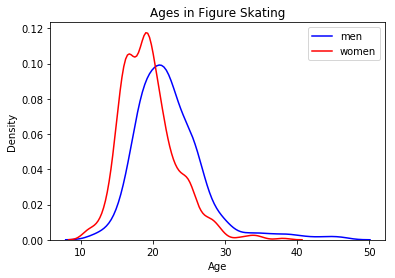

In [13]:
sns.distplot(mfs.Age.dropna(), color = 'blue', hist = False, label='men')
sns.distplot(ffs.Age.dropna(), color = 'red', hist = False, label='women')
plt.ylabel('Density')
plt.title('Ages in Figure Skating')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


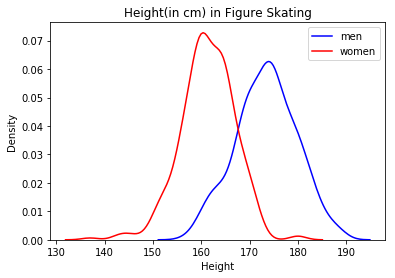

In [14]:
sns.distplot(mfs.Height.dropna(), color = 'blue', hist=False, label = 'men')
sns.distplot(ffs.Height.dropna(), color = 'red', hist=False, label = 'women')
plt.ylabel('Density')
plt.title('Height(in cm) in Figure Skating')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


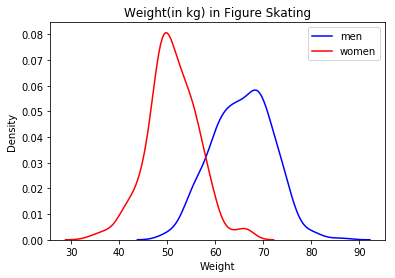

In [15]:
sns.distplot(mfs.Weight.dropna(), color = 'blue', hist=False, label = 'men')
sns.distplot(ffs.Weight.dropna(), color = 'red', hist=False, label = 'women')
plt.ylabel('Density')
plt.title('Weight(in kg) in Figure Skating')
plt.show()

Are figure skaters potentially underweight for their respective heights/age? Only way to test this is with BMI (not the most reliable methods), but we might be able to see if it results in something.

In [64]:
tempm = mfs[['Weight', 'Height']].dropna()
tempf = ffs[['Weight', 'Height']].dropna()
tempm.Height = tempm.Height/100.0
tempf.Height = tempf.Height/100.0
BMIm = tempm.Weight/(tempm.Height*tempm.Height)
BMIf = tempf.Weight/(tempf.Height*tempf.Height)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


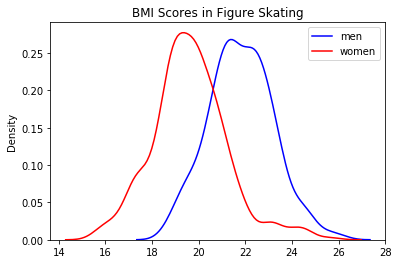

In [65]:
sns.distplot(BMIm, color = 'blue', hist=False, label = 'men')
sns.distplot(BMIf, color = 'red', hist=False, label= 'women')
plt.ylabel('Density')
plt.title('BMI Scores in Figure Skating')
plt.show()

A "healthy" BMI value is considered to be between 18 to 24. We can see here that the men mostly fit into that area, but female figure skaters have a lower BMI overall.